['' '1' '01' '001' '0001' '00001' '00000']
[0, 1, 2, 3, 4, 5, 5] 7
5
7


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


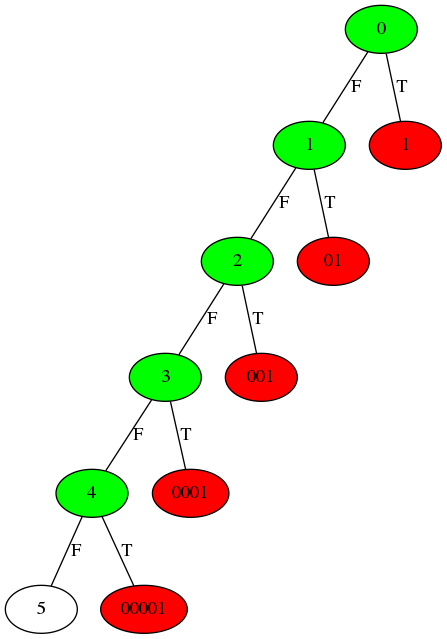

In [2]:
import numpy as np
import pydotplus as pydot
from IPython.display import Image, display
import os
data = np.array([(0, ''), (1, '1'), (2, '01'), (3, '001'), (4, '0001'), (5, '00001'), (6, '00000')])

paths = data[:,1]
print(paths)
n = len(paths)
d = [len(x) for x in paths]
print(d,n)   
#jedinice = np.count_nonzero(1 for x in paths if '1' in x)

jedinice = np.sum(1 for x in paths if '1' in x)
print(jedinice)




maks1 = max(d)
print(n)
maks1=maks1+1
G = pydot.Dot(graph_type="graph")
for i in range(jedinice):
    node = pydot.Node(i, style="filled", fillcolor='green')
    G.add_node(node)
   
for i in range(jedinice):
    edge = pydot.Edge(i,i+1,label='F')
    G.add_edge(edge)
i=-1
for path in paths[1:]:
    i=i+1
    for p in path:
        if p == '1':
            node = pydot.Node(maks1, style="filled", fillcolor='red',label=path)
            G.add_node(node)
            edge = pydot.Edge(i,maks1,label='T')
            G.add_edge(edge)
            maks1=maks1+1
            
    
    
    
im = Image(G.create_png())
display(im)